In [61]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [62]:
rowsize=112
colsize=112
data=[]
labels=[]

In [63]:
folders=['with_mask','without_mask']
for category in folders:    
    path=os.path.join('dataset1',category)
    for file in os.listdir(path):
        img_path=os.path.join(path,file)
        img=cv2.imread(img_path)
        try:
            img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            img=cv2.resize(img,(rowsize,colsize))
            data.append(img)
            labels.append(category)
        except Exception as E:
            print("Exception encountered: ",E)

In [64]:
np.save('data_cnn',data)
np.save('labels_cnn',labels)

In [65]:
import numpy as np
data=np.load('data_cnn.npy')
labels=np.load('labels_cnn.npy')

In [66]:
len(data)

7549

In [67]:
data=np.array(data)

In [68]:
data.shape

(7549, 112, 112)

In [69]:
rowsize=112
colsize=112
data=data/255.0
data=np.reshape(data,(data.shape[0],rowsize,colsize,1))

In [117]:
labels.shape

(7549, 2)

In [71]:
from sklearn.preprocessing import LabelBinarizer

LB=LabelBinarizer()
labels=LB.fit_transform(labels)
labels=to_categorical(labels)
labels=np.array(labels)
labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [72]:
x_train,x_test,y_train,y_test=train_test_split(data,labels,test_size=0.2,random_state=1)

In [73]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import MaxPooling2D, Conv2D


In [74]:
classes=2
batchsize=32#hyperparameter of gradient descent that controls the number of
#training samples to work through before the model's internal parameters are rotated

In [93]:
model=Sequential()

In [94]:
#first layer group 
model.add(Conv2D(64,(3,3),input_shape=(rowsize,colsize,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [95]:
#Second layer group
model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [96]:
model.add(Flatten())
model.add(Dropout(0.5))

In [97]:
model.add(Dense(64,activation='relu'))
model.add(Dense(classes,activation='softmax'))

In [80]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 110, 110, 64)      640       
_________________________________________________________________
activation (Activation)      (None, 110, 110, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 53, 53, 128)       73856     
_________________________________________________________________
activation_1 (Activation)    (None, 53, 53, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 86528)             0

In [110]:
from keras.optimizers import Adam
epochs=10
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=epochs,validation_split=0.25)

Epoch 1/10
142/142 [==============================] - 233s 2s/step - loss: 0.0765 - accuracy: 0.9720 - val_loss: 0.4340 - val_accuracy: 0.8675
Epoch 2/10
142/142 [==============================] - 133s 934ms/step - loss: 0.0503 - accuracy: 0.9837 - val_loss: 0.4867 - val_accuracy: 0.8775
Epoch 3/10
142/142 [==============================] - 134s 941ms/step - loss: 0.0410 - accuracy: 0.9876 - val_loss: 0.4953 - val_accuracy: 0.8722
Epoch 4/10
142/142 [==============================] - 135s 954ms/step - loss: 0.0447 - accuracy: 0.9852 - val_loss: 0.5711 - val_accuracy: 0.8742
Epoch 5/10
142/142 [==============================] - 133s 938ms/step - loss: 0.0409 - accuracy: 0.9850 - val_loss: 0.5385 - val_accuracy: 0.8689
Epoch 6/10
142/142 [==============================] - 130s 916ms/step - loss: 0.0351 - accuracy: 0.9872 - val_loss: 0.5337 - val_accuracy: 0.8709
Epoch 7/10
142/142 [==============================] - 129s 908ms/step - loss: 0.0405 - accuracy: 0.9874 - val_loss: 0.5878 - va

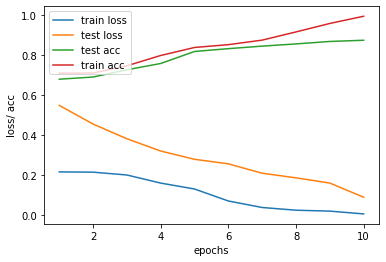

In [2]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend(['train loss','test loss'],loc='upper left')

In [ ]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.ylabel('accuracy')
plt.legend(['train acc','test acc'],loc='upper left')

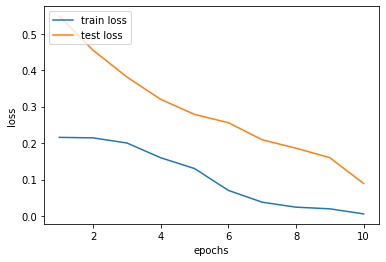

In [3]:
x=np.array([1,2,3,4,5,6,7,8,9,10])
trainloss=np.array([0.2156,0.2142,0.2001,0.1596,0.1300,0.0701,0.0377,0.0241,0.0196,0.0056])
testloss=np.array([0.5478,0.4545,0.3811,0.3198,0.2785,0.2558,0.2089,0.1859,0.1598,0.0889])

plt.plot(x,trainloss)
plt.plot(x,testloss)

plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train loss','test loss'],loc='upper left')

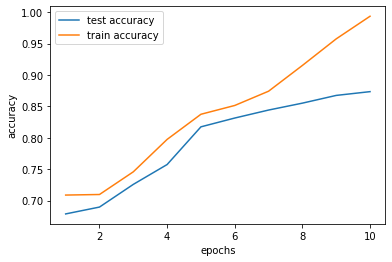

In [4]:
trainaccuracy=np.array([0.7088,0.7097,.7458,0.7974,0.8374,0.8514,0.8741,0.9151,0.9574,0.9934])
testaccuracy=np.array([0.6788,0.6897,.7258,0.7574,0.8174,0.8314,0.8441,0.8551,0.8674,0.8734])
plt.plot(x,testaccuracy)
plt.plot(x,trainaccuracy)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['test accuracy','train accuracy'],loc='upper left')

In [116]:
model.save('FaceMaskDetection-CNN1.h5')
np.save('history.npy',history.history)

In [81]:
from keras.models import load_model
model=load_model('FaceMaskDetection-CNN1.h5')
history=np.load('history.npy',allow_pickle='TRUE').item()

In [48]:
!pip install matplotlib
import matplotlib.pyplot as plt

In [101]:
score=model.evaluate(x_test,y_test)

48/48 [==============================] - 10s 215ms/step - loss: 0.3901 - accuracy: 0.8795


In [82]:
haar_classifier=cv2.CascadeClassifier('facedetection.xml')

In [83]:
color_dict={0:(0,255,0),1:(0,0,255)}
msg_dict={0:"Good to go",1:"No mask Alert!"}

In [84]:
capture=cv2.VideoCapture(0)
flag,img=capture.read()

while True:
    flag,img=capture.read()
    if flag: 
        grayimg=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        faces=haar_classifier.detectMultiScale(grayimg)
        for x,y,w,h in faces:            
            face=grayimg[y:y+w,x:x+w]
            face=cv2.resize(face,(rowsize,colsize))
            face=face/255.0
            face=face.reshape(1,rowsize,colsize,1)
            print(face)
            print(face.shape)
            result=model.predict(face)
            
            label=np.argmax(result,axis=1)[0]
            
            cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
            #cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
            cv2.putText(img,msg_dict[label],(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,fontScale=1,color=(0,0,0),thickness=3)
            cv2.imshow('image',img)
            
        if cv2.waitKey(2)==27:
            break
capture.release()
cv2.destroyAllWindows()
    

[[[[0.57647059]
   [0.57254902]
   [0.56862745]
   ...
   [0.62352941]
   [0.61960784]
   [0.61960784]]

  [[0.58039216]
   [0.57647059]
   [0.56862745]
   ...
   [0.62352941]
   [0.61960784]
   [0.61960784]]

  [[0.58431373]
   [0.58039216]
   [0.57647059]
   ...
   [0.62745098]
   [0.62352941]
   [0.62352941]]

  ...

  [[0.74117647]
   [0.74117647]
   [0.74901961]
   ...
   [0.63529412]
   [0.63137255]
   [0.62745098]]

  [[0.74509804]
   [0.74509804]
   [0.75294118]
   ...
   [0.63529412]
   [0.62745098]
   [0.62745098]]

  [[0.74509804]
   [0.74901961]
   [0.75294118]
   ...
   [0.63137255]
   [0.62745098]
   [0.62745098]]]]
(1, 112, 112, 1)
[[[[0.57254902]
   [0.57254902]
   [0.57254902]
   ...
   [0.32941176]
   [0.3254902 ]
   [0.32156863]]

  [[0.58431373]
   [0.58431373]
   [0.58039216]
   ...
   [0.3254902 ]
   [0.3254902 ]
   [0.32156863]]

  [[0.6       ]
   [0.6       ]
   [0.59607843]
   ...
   [0.3254902 ]
   [0.32156863]
   [0.32156863]]

  ...

  [[0.44313725]
   [0.4

[[[[0.61568627]
   [0.61960784]
   [0.63137255]
   ...
   [0.29803922]
   [0.29411765]
   [0.29411765]]

  [[0.61568627]
   [0.61960784]
   [0.62745098]
   ...
   [0.30196078]
   [0.29803922]
   [0.29803922]]

  [[0.61176471]
   [0.61568627]
   [0.61960784]
   ...
   [0.30588235]
   [0.30588235]
   [0.30196078]]

  ...

  [[0.49411765]
   [0.49803922]
   [0.50588235]
   ...
   [0.34509804]
   [0.34509804]
   [0.34509804]]

  [[0.48627451]
   [0.49019608]
   [0.49803922]
   ...
   [0.34509804]
   [0.34509804]
   [0.34901961]]

  [[0.48235294]
   [0.48627451]
   [0.49411765]
   ...
   [0.34509804]
   [0.34901961]
   [0.34901961]]]]
(1, 112, 112, 1)
[[[[0.61568627]
   [0.61176471]
   [0.60784314]
   ...
   [0.29803922]
   [0.29803922]
   [0.29803922]]

  [[0.61960784]
   [0.61960784]
   [0.61568627]
   ...
   [0.29803922]
   [0.29803922]
   [0.29803922]]

  [[0.63137255]
   [0.63137255]
   [0.63137255]
   ...
   [0.29803922]
   [0.30196078]
   [0.30196078]]

  ...

  [[0.53333333]
   [0.5

[[[[0.58431373]
   [0.59215686]
   [0.60784314]
   ...
   [0.29803922]
   [0.29803922]
   [0.30196078]]

  [[0.58039216]
   [0.59215686]
   [0.60392157]
   ...
   [0.29803922]
   [0.30196078]
   [0.30588235]]

  [[0.57254902]
   [0.58039216]
   [0.58823529]
   ...
   [0.30196078]
   [0.30588235]
   [0.30588235]]

  ...

  [[0.4627451 ]
   [0.45882353]
   [0.45882353]
   ...
   [0.26666667]
   [0.27058824]
   [0.26666667]]

  [[0.4627451 ]
   [0.4627451 ]
   [0.4627451 ]
   ...
   [0.27058824]
   [0.27058824]
   [0.2745098 ]]

  [[0.4627451 ]
   [0.4627451 ]
   [0.4627451 ]
   ...
   [0.27058824]
   [0.2745098 ]
   [0.27843137]]]]
(1, 112, 112, 1)
[[[[0.8627451 ]
   [0.88235294]
   [0.87843137]
   ...
   [0.50196078]
   [0.50588235]
   [0.50980392]]

  [[0.87058824]
   [0.89019608]
   [0.89019608]
   ...
   [0.49803922]
   [0.50196078]
   [0.50196078]]

  [[0.87058824]
   [0.87843137]
   [0.89019608]
   ...
   [0.49411765]
   [0.49803922]
   [0.50196078]]

  ...

  [[0.48627451]
   [0.4

[[[[0.87058824]
   [0.94117647]
   [0.94901961]
   ...
   [0.48627451]
   [0.49411765]
   [0.48627451]]

  [[0.91372549]
   [0.91764706]
   [0.91764706]
   ...
   [0.48627451]
   [0.49411765]
   [0.48627451]]

  [[0.8627451 ]
   [0.88235294]
   [0.90980392]
   ...
   [0.48627451]
   [0.49019608]
   [0.48627451]]

  ...

  [[0.48235294]
   [0.48627451]
   [0.48627451]
   ...
   [0.30196078]
   [0.30196078]
   [0.30196078]]

  [[0.47843137]
   [0.47843137]
   [0.4745098 ]
   ...
   [0.30196078]
   [0.30196078]
   [0.30588235]]

  [[0.48235294]
   [0.47843137]
   [0.47843137]
   ...
   [0.30588235]
   [0.30980392]
   [0.30980392]]]]
(1, 112, 112, 1)
[[[[0.76078431]
   [0.72156863]
   [0.70196078]
   ...
   [0.46666667]
   [0.47058824]
   [0.4745098 ]]

  [[0.71764706]
   [0.71372549]
   [0.71372549]
   ...
   [0.47058824]
   [0.47058824]
   [0.47058824]]

  [[0.68627451]
   [0.74117647]
   [0.78431373]
   ...
   [0.4745098 ]
   [0.4745098 ]
   [0.47058824]]

  ...

  [[0.47843137]
   [0.4

[[[[0.36470588]
   [0.37254902]
   [0.37647059]
   ...
   [0.31764706]
   [0.31372549]
   [0.30980392]]

  [[0.36470588]
   [0.36862745]
   [0.37254902]
   ...
   [0.31764706]
   [0.30980392]
   [0.30588235]]

  [[0.36470588]
   [0.36862745]
   [0.36862745]
   ...
   [0.31764706]
   [0.30980392]
   [0.30588235]]

  ...

  [[0.24705882]
   [0.25098039]
   [0.25098039]
   ...
   [0.32941176]
   [0.33333333]
   [0.33333333]]

  [[0.24705882]
   [0.25098039]
   [0.25098039]
   ...
   [0.3254902 ]
   [0.32941176]
   [0.32941176]]

  [[0.24705882]
   [0.25098039]
   [0.25098039]
   ...
   [0.32156863]
   [0.32156863]
   [0.3254902 ]]]]
(1, 112, 112, 1)
[[[[0.8627451 ]
   [0.89803922]
   [0.90196078]
   ...
   [0.52941176]
   [0.53333333]
   [0.5372549 ]]

  [[0.87058824]
   [0.89803922]
   [0.87843137]
   ...
   [0.53333333]
   [0.53333333]
   [0.5372549 ]]

  [[0.87843137]
   [0.89019608]
   [0.85490196]
   ...
   [0.5372549 ]
   [0.5372549 ]
   [0.53333333]]

  ...

  [[0.61176471]
   [0.3

[[[[0.56470588]
   [0.56470588]
   [0.56862745]
   ...
   [0.3254902 ]
   [0.32156863]
   [0.32156863]]

  [[0.56470588]
   [0.56862745]
   [0.56862745]
   ...
   [0.3254902 ]
   [0.32156863]
   [0.32156863]]

  [[0.56862745]
   [0.57254902]
   [0.57254902]
   ...
   [0.3254902 ]
   [0.3254902 ]
   [0.32156863]]

  ...

  [[0.52941176]
   [0.52941176]
   [0.5254902 ]
   ...
   [0.95294118]
   [0.95294118]
   [0.95294118]]

  [[0.53333333]
   [0.53333333]
   [0.52941176]
   ...
   [0.95294118]
   [0.95294118]
   [0.95294118]]

  [[0.5372549 ]
   [0.53333333]
   [0.53333333]
   ...
   [0.95294118]
   [0.95294118]
   [0.95294118]]]]
(1, 112, 112, 1)


In [44]:
capture.release()
cv2.destroyAllWindows()